1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

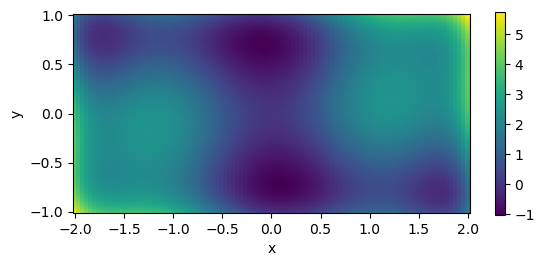

Minimum at x,y: [-0.08984202  0.71265644],
Function value at global minima: -1.031628453489866

Minimum at x,y: [ 0.08984201 -0.71265645],
Function value at global minima: -1.0316284534898557

Global minima are: 2 and in this poit the function value is: -1.0316284534898557


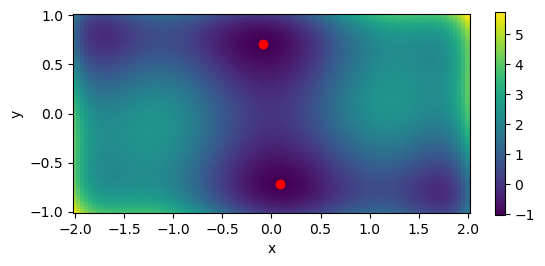


With initial value of (0, 0) the result is: [0. 0.]


In [13]:
import numpy as np
import pylab as pl
from scipy import optimize as op
import matplotlib.pyplot as plt

#definisco la funzione
def f(x, y):
    return (4 - 2.1*x**2 + x**4/3) * x**2 + x*y + (4*y**2 - 4) * y**2

#funzione che mi ritorna il valore della funzione f(x,y)
def f_res(xy):
  return f(*xy)

#x,y range
x_min, x_max = -2, 2
y_min, y_max = -1, 1

#-->visuaizzo la funzione
#creo la griglia di punti
x, y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# calcolo la funzione in ogni punto
z = f(x, y)

#creo il plot
plt.imshow(z, extent=[x_min, x_max, y_min, y_max])
plt.xlabel('x')
plt.ylabel('y')
ec = plt.pcolor(x, y, z)
plt.colorbar(ec, shrink=0.55)
plt.show()

#cerco e stampo i minimi globali della funzione
gmins=[op.minimize(f_res,[0,0.5]).x,op.minimize(f_res,[0,-0.5]).x]
for xy_val in gmins:
  print(f"Minimum at x,y: {xy_val},\nFunction value at global minima: {f_res(xy_val)}\n")
print(f"Global minima are: {len(gmins)} and in this poit the function value is: {f_res(xy_val)}")

#plot del punto di minima
plt.imshow(z, extent=[x_min, x_max, y_min, y_max]) 
plt.xlabel('x')
plt.ylabel('y')
ec = plt.pcolor(x, y, z)
plt.colorbar(ec, shrink=0.55)
plt.plot(xy_val[0],xy_val[1], "o", color = "r")
plt.plot(-xy_val[0],-xy_val[1], "o", color = "r")
plt.show()

xy_p = (0,0)
print(f"\nWith initial value of {xy_p} the result is: {op.minimize(f_res, x0=xy_p, method=None).x}")



2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:


$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

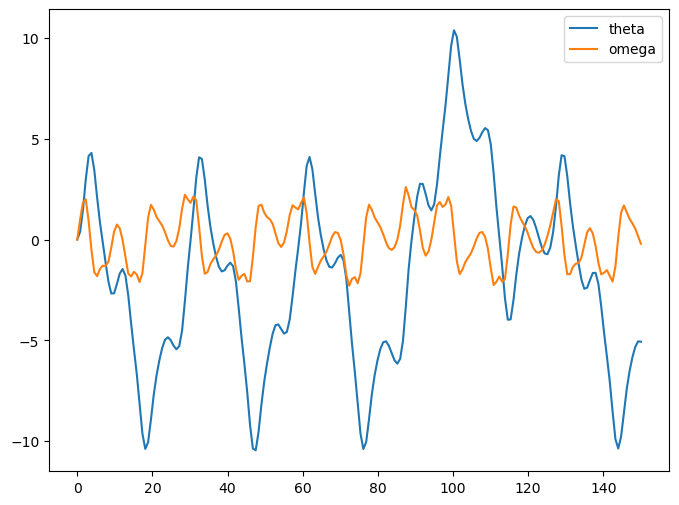

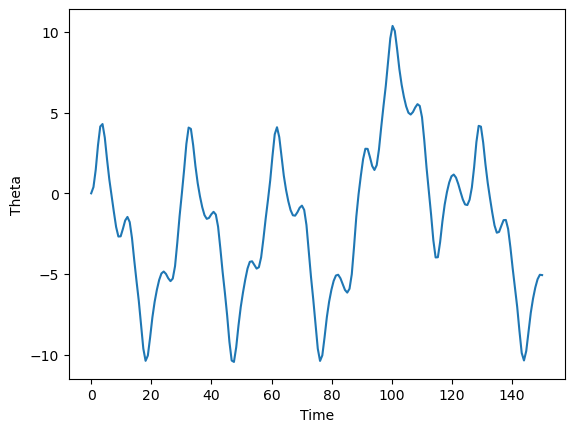

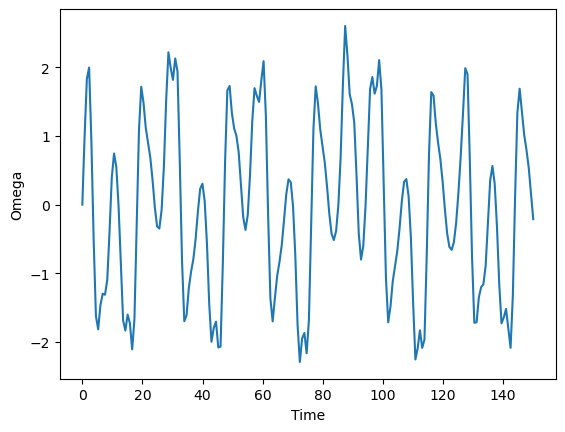

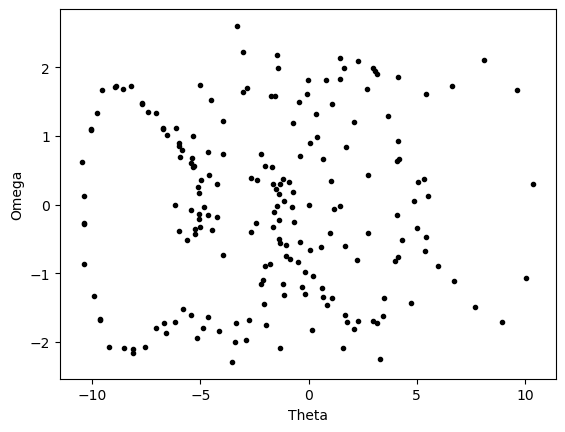

In [16]:
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
import numpy as np

#funzione ODE
def pendulum_ode(y, t, Q, d, Omega):
    theta, omega = y
    dydt = [omega, -1/Q*omega + np.sin(theta) + d*np.cos(Omega*t)]
    return dydt

#condizioni iniziali
theta0 = 0
omega0 = 0

Q = 2.0
d = 1.5
Omega = 0.65

#array di punti temporali
t = np.linspace(0, 150, 200)

#risolvo l'ODE
solution = odeint(pendulum_ode, [theta0, omega0], t, args=(Q, d, Omega))
theta, omega = solution.T


#plot insieme
plt.figure(figsize=(8, 6))
plt.plot(t, solution[:, 0], label = "theta")
plt.plot(t, solution[:, 1], label = "omega")
plt.legend()
plt.show()

#plot theta in funzione del tempo
plt.plot(t, theta)
plt.xlabel('Time')
plt.ylabel('Theta')
plt.show()

#plot omega in funzione del tempo
plt.plot(t, omega)
plt.xlabel('Time')
plt.ylabel('Omega')
plt.show()


#--->3<---
#utilizzo il diagramma di Poincaré per verificare se il moto del pendolo è caotico:
#se il diagramma mostra una grande quantità di punti concentrati in un'area limitata,
#questo potrebbe indicare che il moto del pendolo è caotico.

#--> guardando il grafico si può notare che esistono delle aree di punti che hanno
#una struttura complessa e irregolare, il pendolo potrebbe avere un comportamento caotico per
#alcuni set di dati.

# Traccio il diagramma di Poincaré
plt.plot(theta, omega, 'k.')
plt.xlabel('Theta')
plt.ylabel('Omega')
plt.show()




3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

[ 4000.  6100.  9800. 35200. 59400. 41700. 19000. 13000.  8300.  9100.
  7400.  8000. 12300. 19500. 45700. 51100. 29700. 15800.  9700. 10100.
  8600.]
[30000. 47200. 70200. 77400. 36300. 20600. 18100. 21400. 22000. 25400.
 27100. 40300. 57000. 76600. 52300. 19500. 11200.  7600. 14600. 16200.
 24700.]


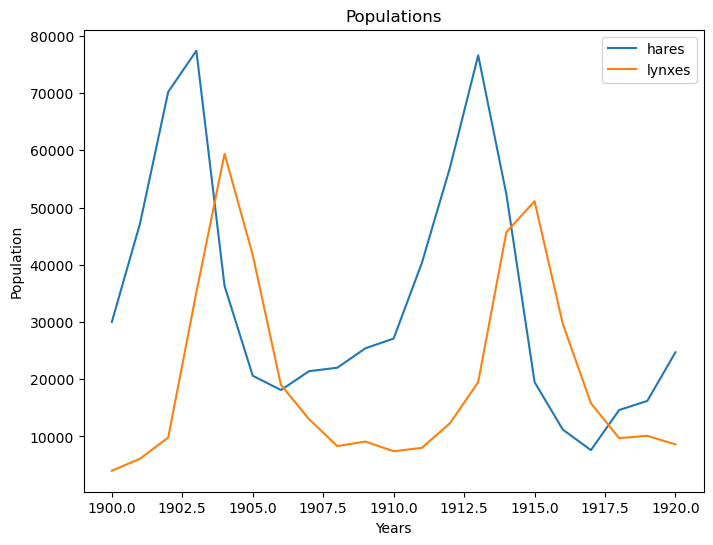

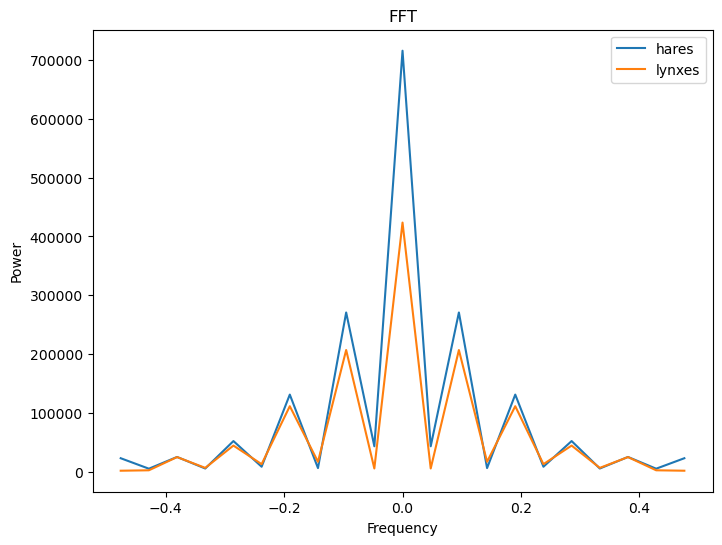

In [2]:
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt

#leggo il datset
dataset = np.loadtxt('data/populations.txt')
#salvo le singole colonne
year, hare, lynxe, carrot = dataset.T

print(lynxe)
print(hare)


#FFT
fft_lynxes = fftpack.fft(lynxe)
fft_hares = fftpack.fft(hare)

#Potenza
power_lynxes = np.abs(fft_lynxes)
power_hares = np.abs(fft_hares) 

#frequenze
sample_freq = fftpack.fftfreq(fft_lynxes.size)
i = sample_freq.argsort()

#creo un grafico con i dati base
plt.figure(figsize=(8, 6))
plt.plot(year,hare, label='hares')
plt.plot(year,lynxe, label='lynxes')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Populations')
plt.legend()
plt.show()

#creo un grafico con il risultato della FFT
plt.figure(figsize=(8, 6))
plt.plot(sample_freq[i], power_hares[i], label='hares')
plt.plot(sample_freq[i], power_lynxes[i], label='lynxes')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(('Hares', 'Lynxs'), loc='best')
plt.title("FFT")
plt.legend()
plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Original Image')

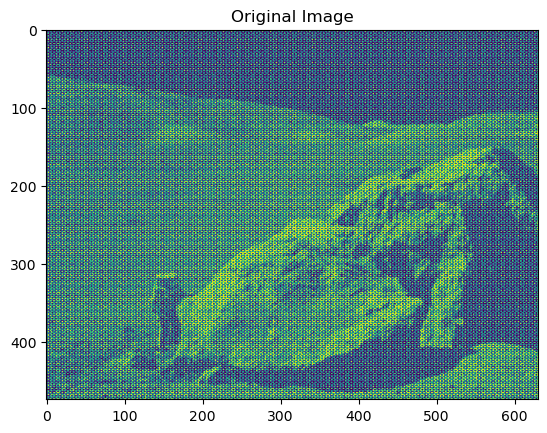

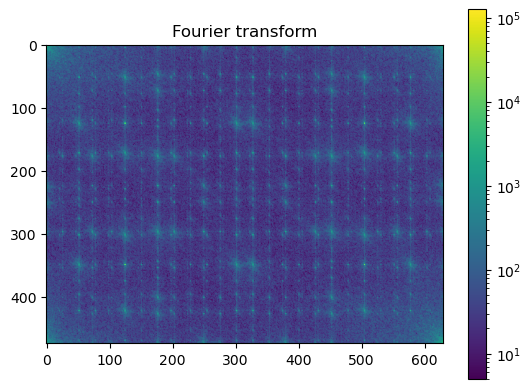

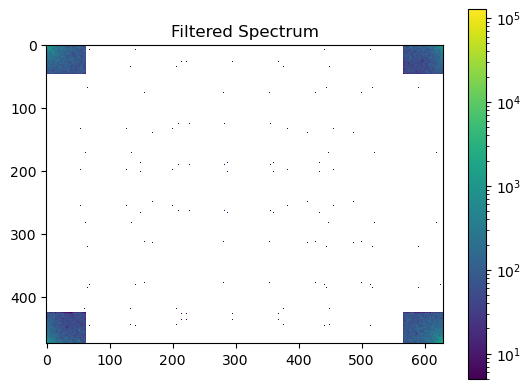

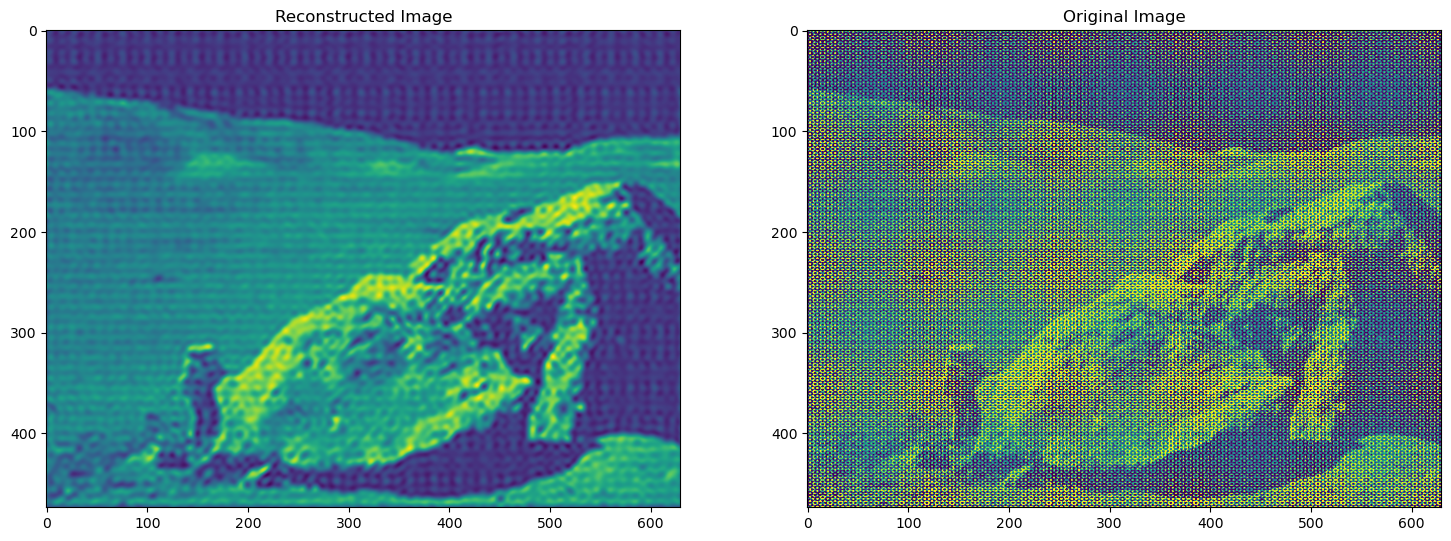

In [3]:
from matplotlib.colors import LogNorm

#-->1<-- 
img = plt.imread("images/moonlanding.png")
plt.title('Original Image')
plt.imshow(img)

#applico FFT
im_fft = fftpack.fft2(img)

#visualizzo il risultato
def plot_spectrum(im_fft):
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

#plotto lo spettro
plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')


#-->2<--
keep_fraction = 0.1

#creo una copia di im_fft
im_fft2 = im_fft.copy()

#r = numero di colonne dell'array, c = numero di righe dell'array 
r, c = im_fft2.shape

#setto a zero tutte le colonne tra r*keep_fraction e r*(1-keep_fraction)
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

#setto a zero tutte le righe tra r*keep_fraction e r*(1-keep_fraction)
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

#plot dello spettro filtrato
plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

#ricostruisco l'immagine dallo spettro filtrato, tenendo solo la parte reale
im_new = fftpack.ifft2(im_fft2).real

#creo un subplot con le due immagini
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8)) 
ax1.imshow(im_new)
ax1.set_title('Reconstructed Image')
ax2.imshow(img)
ax2.set_title('Original Image')
